## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#2 Check the shape of the DataFrame (rows, columns)

In [ ]:
#3 Look at the data types of the columns

In [3]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
#5 Prepare  X (independent variables) and y (dependent variable)
from sklearn.model_selection import train_test_split

x = df.drop(columns='price')
y = df['price']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

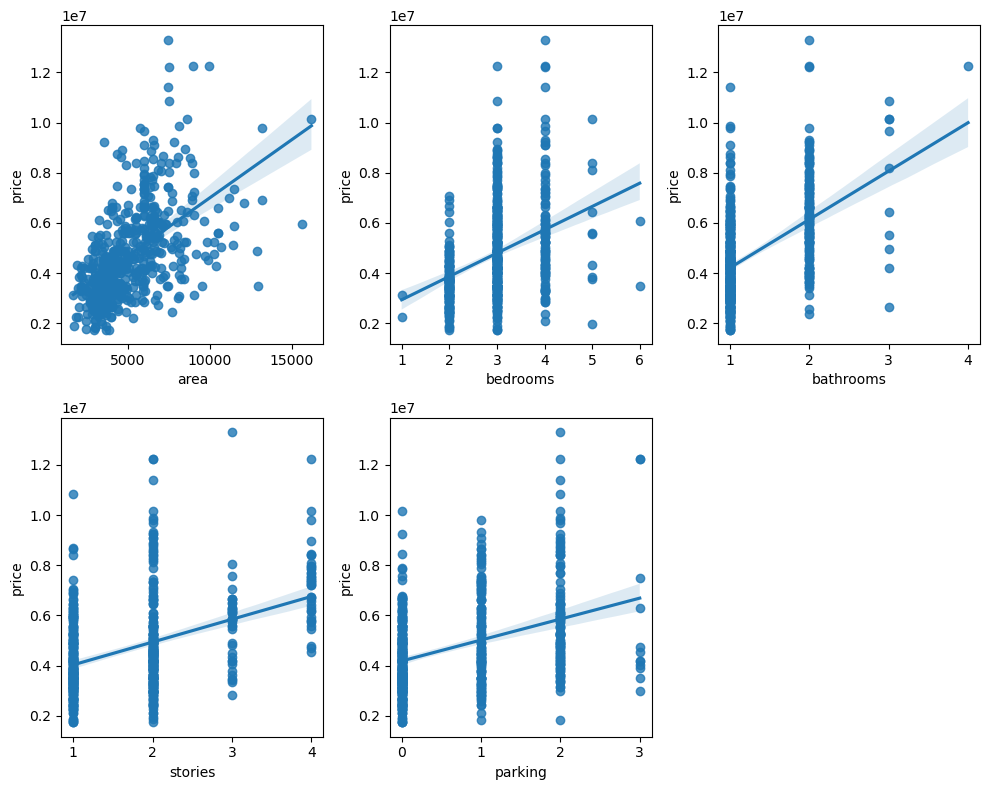

In [41]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(2,3,figsize = (10,8))
axes = axes.flatten()
cols = x.select_dtypes(include=['number']).columns

for i,col in enumerate(cols):
  sns.regplot(data=df, x=col, y='price', ax=axes[i])

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [ ]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

cols = x.select_dtypes(exclude='number').columns

for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df[cols]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,2
543,0,0,0,0,0,0,0


In [52]:
#8  Avoiding the Dummy Variable Trap
pd.get_dummies(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [62]:
#9 Apply feature scaling on numerical variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = df.select_dtypes(include=['number']).columns

for col in cols:
  df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

df[cols]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [70]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
x = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [72]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [74]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred = model.predict(x_train)

error = y_pred -y_train

<Axes: ylabel='price'>

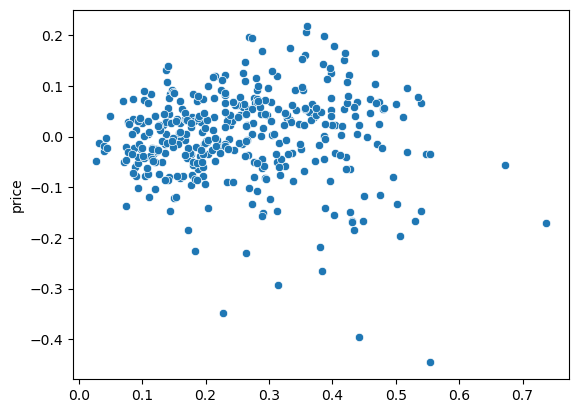

In [75]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
sns.scatterplot(x = y_pred,y = error)

In [ ]:
#14  Predic on the test set

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)